# Lotto Number Predictions

This notebook performs a download of the most recent winning numbers from the Lotto649 (a lottery managed by the **British Columbia Lotto Corporation** in BC, Canada), and performs basic number analysis on them in order to describe the most winningest numbers in history.



## Imports

In [1]:
import sys
import pandas as pd
import urllib.request
import zipfile

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

## Resources

In [2]:
# Main Getter Function

# Download 
def dl_file(url, data_path, file_name):
    print("### Downloading " + url + " and saving as " + data_path + file_name)
    urllib.request.urlretrieve(url, data_path + file_name)
    
    
# Unzip
def unzip(data_path, file_name):
  print("### Unzipping " + file_name + " at " + data_path)
  #extension = ".zip"

  zip_ref = zipfile.ZipFile(data_path + file_name, 'r')
  zip_ref.extractall(data_path)
  zip_ref.close()

# Variables 
# TODO - make abstract to handle other sets
url = "http://www.bclc.com/documents/DownloadableNumbers/CSV/649.zip"
data_path = "data/"
file_name = "649"

# download zip file and save
dl_file(url, data_path, file_name)

# unzip to csv
unzip(data_path, file_name)


### Downloading http://www.bclc.com/documents/DownloadableNumbers/CSV/649.zip and saving as data/649
### Unzipping 649 at data/


## Conversion

In [3]:
base_reader = pd.read_csv(data_path + file_name + ".csv")
base_reader.set_index("DRAW NUMBER", inplace=True)
base_reader.tail()

,PRODUCT,SEQUENCE NUMBER,DRAW DATE,NUMBER DRAWN 1,NUMBER DRAWN 2,NUMBER DRAWN 3,NUMBER DRAWN 4,NUMBER DRAWN 5,NUMBER DRAWN 6,BONUS NUMBER
DRAW NUMBER,,,,,,,,,,
3594,649,0,2018-06-30,2,3,7,11,16,20,17
3595,649,0,2018-07-04,6,25,37,44,47,49,26
3596,649,0,2018-07-07,1,3,25,40,44,47,2
3597,649,0,2018-07-11,1,9,11,38,45,48,25
3598,649,0,2018-07-14,8,10,12,17,22,37,29


In [4]:
columns = list(base_reader.loc[:,'NUMBER DRAWN 1':'NUMBER DRAWN 6'])
draws = base_reader[columns]

draws.tail()

,NUMBER DRAWN 1,NUMBER DRAWN 2,NUMBER DRAWN 3,NUMBER DRAWN 4,NUMBER DRAWN 5,NUMBER DRAWN 6
DRAW NUMBER,,,,,,
3594,2,3,7,11,16,20
3595,6,25,37,44,47,49
3596,1,3,25,40,44,47
3597,1,9,11,38,45,48
3598,8,10,12,17,22,37


## Analysis

### Ball #1

In [5]:
# set
b1 = draws["NUMBER DRAWN 1"]

# describe
b1.describe()

count    3672.000000
mean        7.321895
std         5.808989
min         1.000000
25%         3.000000
50%         6.000000
75%        10.000000
max        38.000000
Name: NUMBER DRAWN 1, dtype: float64

In [6]:
# unique
b1vc = b1.value_counts()
b1vc.columns = ["value"]
b1vc

1     425
2     391
4     348
3     348
5     261
6     239
7     227
9     194
8     191
10    152
11    142
12    127
13    100
14     72
16     69
15     68
17     53
18     52
20     42
19     41
21     28
23     26
22     17
24     13
26     11
27     10
25      6
28      6
30      4
29      4
31      2
33      1
32      1
38      1
Name: NUMBER DRAWN 1, dtype: int64

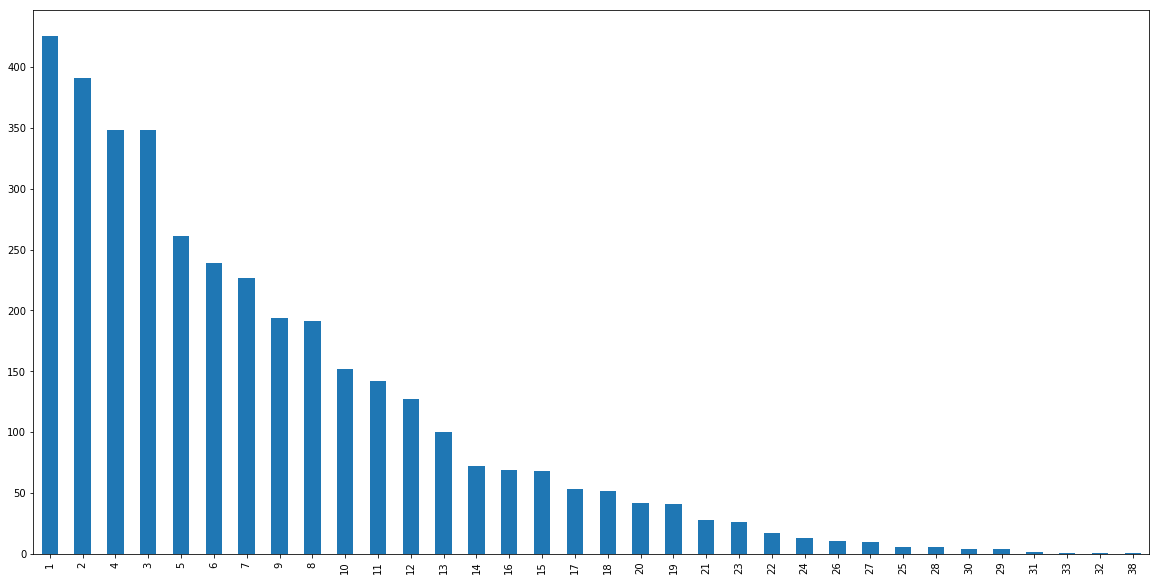

In [7]:
b1vc.plot(kind='bar')

In [58]:
b1vc_vals = b1vc.index
b1vc_vals

Int64Index([ 1,  2,  4,  3,  5,  6,  7,  9,  8, 10, 11, 12, 13, 14, 16, 15, 17,
            18, 20, 19, 21, 23, 22, 24, 26, 27, 25, 28, 30, 29, 31, 33, 32,
            38],
           dtype='int64')

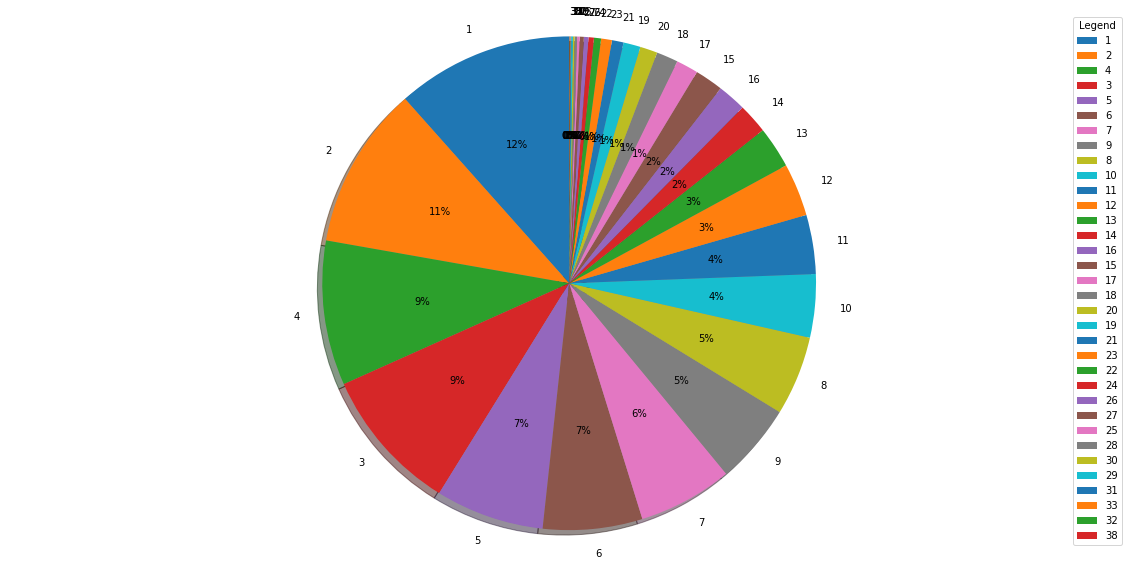

In [59]:
fig1, ax1 = plt.subplots()

explode = (0.05, 0)

ax1.pie(b1vc, autopct='%1.0f%%', labels=b1vc_vals, shadow=True, startangle=90)
ax1.axis('equal')
plt.legend(title="Legend")
plt.show()

### Ball #2

In [8]:
# set
b2 = draws["NUMBER DRAWN 2"]

# describe
b2.describe()

count    3672.000000
mean       14.558551
std         7.559001
min         2.000000
25%         9.000000
50%        14.000000
75%        20.000000
max        43.000000
Name: NUMBER DRAWN 2, dtype: float64

In [9]:
# unique
b2vc = b2.value_counts()
b2vc.columns = ["value"]
b2vc

12    194
8     189
10    184
7     181
9     179
13    178
15    178
14    172
11    165
17    162
16    159
5     152
6     150
20    133
19    129
18    127
21    125
4      98
22     96
3      94
24     84
23     82
26     67
25     63
27     50
29     49
2      47
28     43
30     40
32     26
31     21
33     13
35     11
34     11
36      4
37      4
38      3
40      3
39      3
43      1
41      1
42      1
Name: NUMBER DRAWN 2, dtype: int64

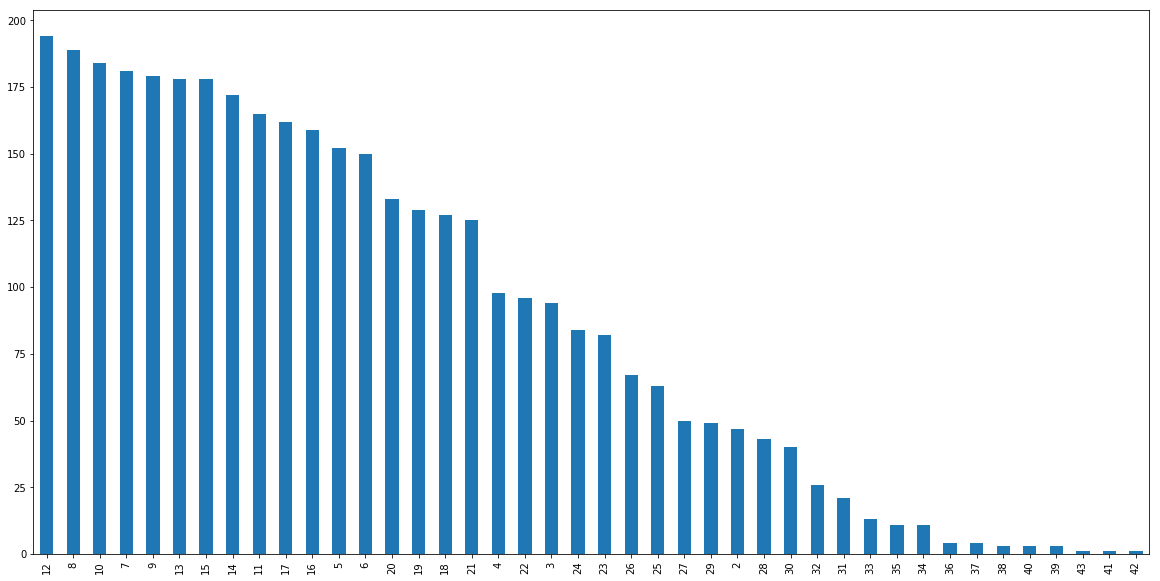

In [10]:
b2vc.plot(kind='bar')

In [56]:
b2vc_vals = b2vc.index
b2vc_vals

Int64Index([12,  8, 10,  7,  9, 13, 15, 14, 11, 17, 16,  5,  6, 20, 19, 18, 21,
             4, 22,  3, 24, 23, 26, 25, 27, 29,  2, 28, 30, 32, 31, 33, 35, 34,
            36, 37, 38, 40, 39, 43, 41, 42],
           dtype='int64')

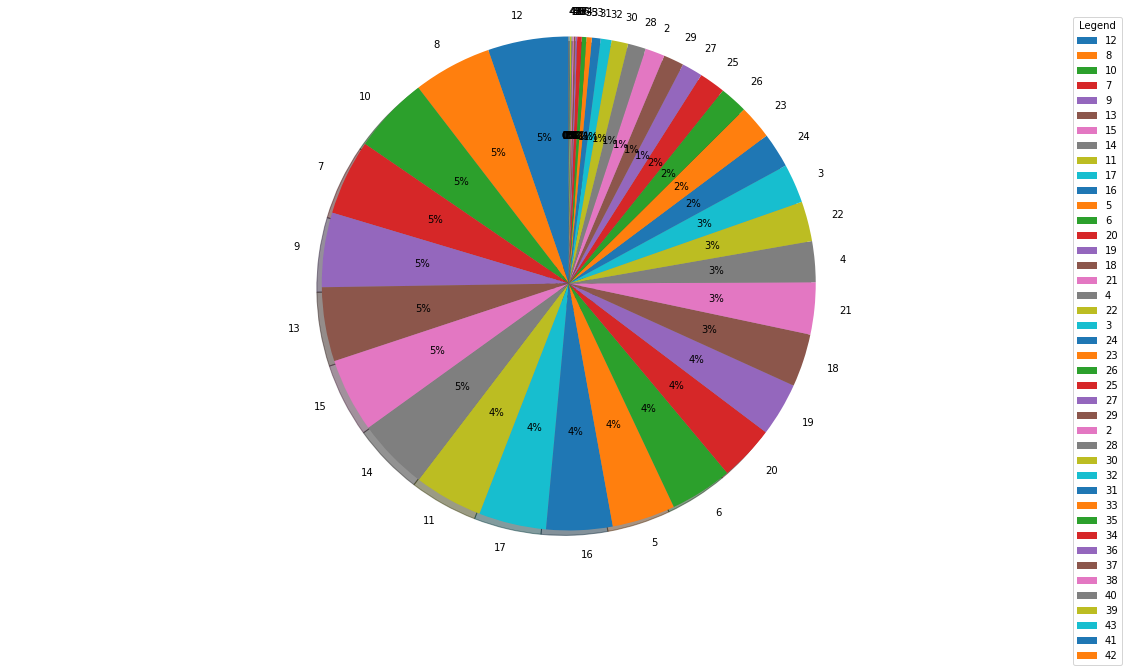

In [57]:
fig1, ax1 = plt.subplots()

explode = (0.05, 0)

ax1.pie(b2vc, autopct='%1.0f%%', labels=b2vc_vals, shadow=True, startangle=90)
ax1.axis('equal')
plt.legend(title="Legend")
plt.show()

### Ball #3

In [11]:
# set
b3 = draws["NUMBER DRAWN 3"]

# describe
b3.describe()

count    3672.000000
mean       21.885349
std         8.177291
min         3.000000
25%        16.000000
50%        22.000000
75%        28.000000
max        45.000000
Name: NUMBER DRAWN 3, dtype: float64

In [12]:
# unique
b3vc = b3.value_counts()
b3vc.columns = ["value"]
b3vc

22    177
23    168
20    164
21    164
19    163
24    161
25    159
17    154
18    149
16    141
26    134
15    132
29    127
27    126
28    115
14    114
13    111
12    104
31    100
30    100
32     93
11     90
33     84
10     76
34     70
9      68
36     59
8      57
7      51
35     51
6      41
37     38
38     28
40     26
39     21
41     18
5      15
42      6
4       6
43      5
3       3
44      2
45      1
Name: NUMBER DRAWN 3, dtype: int64

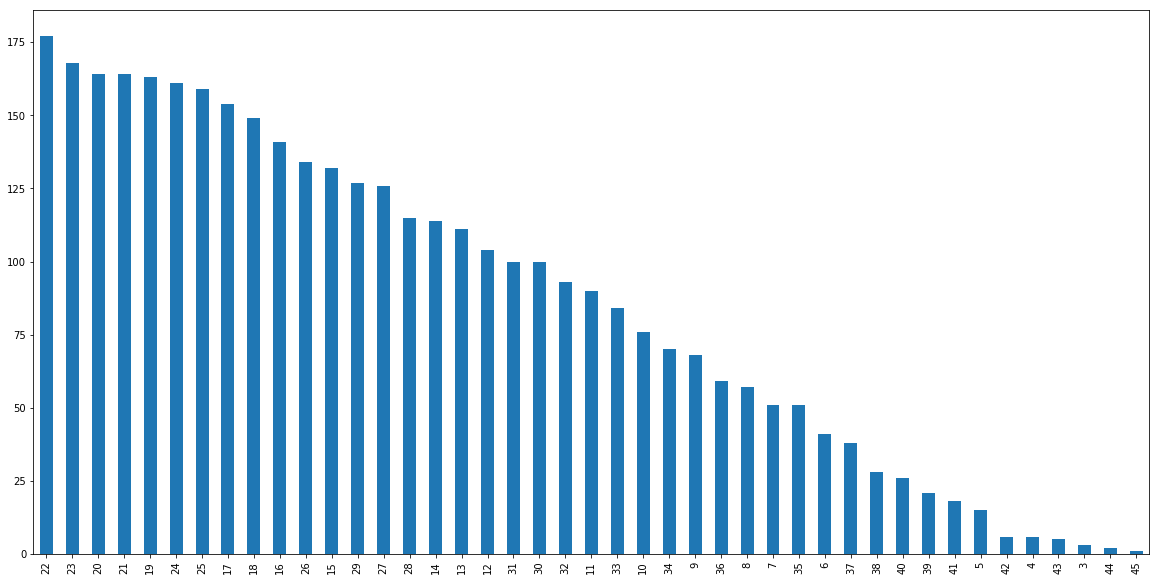

In [13]:
b3vc.plot(kind='bar')

In [54]:
b3vc_vals = b3vc.index
b3vc_vals

Int64Index([22, 23, 20, 21, 19, 24, 25, 17, 18, 16, 26, 15, 29, 27, 28, 14, 13,
            12, 31, 30, 32, 11, 33, 10, 34,  9, 36,  8,  7, 35,  6, 37, 38, 40,
            39, 41,  5, 42,  4, 43,  3, 44, 45],
           dtype='int64')

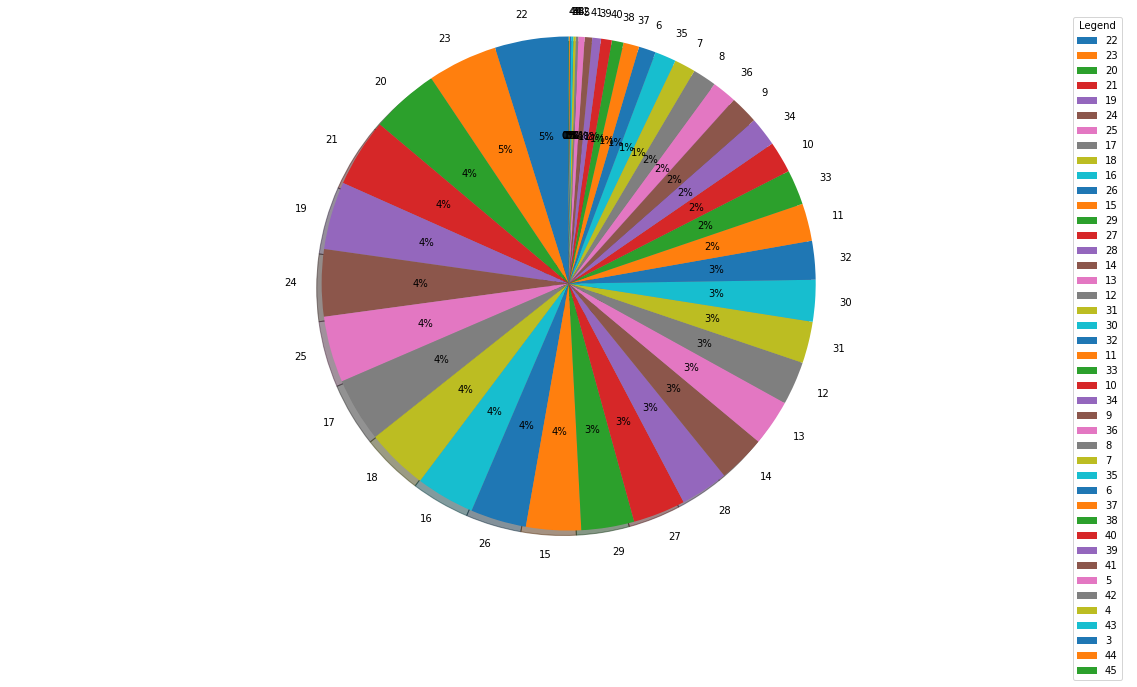

In [55]:
fig1, ax1 = plt.subplots()

explode = (0.05, 0)

ax1.pie(b3vc, autopct='%1.0f%%', labels=b3vc_vals, shadow=True, startangle=90)
ax1.axis('equal')
plt.legend(title="Legend")
plt.show()

### Ball #4

In [14]:
# set
b4 = draws["NUMBER DRAWN 4"]

# describe
b4.describe()

count    3672.000000
mean       28.977397
std         8.082271
min         4.000000
25%        23.000000
50%        30.000000
75%        35.000000
max        47.000000
Name: NUMBER DRAWN 4, dtype: float64

In [15]:
# unique
b4vc = b4.value_counts()
b4vc.columns = ["value"]
b4vc

31    200
27    173
34    171
33    164
32    163
30    160
26    160
28    159
29    148
36    145
25    135
23    132
35    130
37    122
38    120
24    118
22    109
20    108
40    107
39    106
21     97
19     81
18     79
41     78
16     61
42     59
17     59
43     48
15     47
14     36
44     29
11     27
13     27
12     25
45     21
10     19
9      15
46     13
8      11
47      4
7       3
4       2
6       1
Name: NUMBER DRAWN 4, dtype: int64

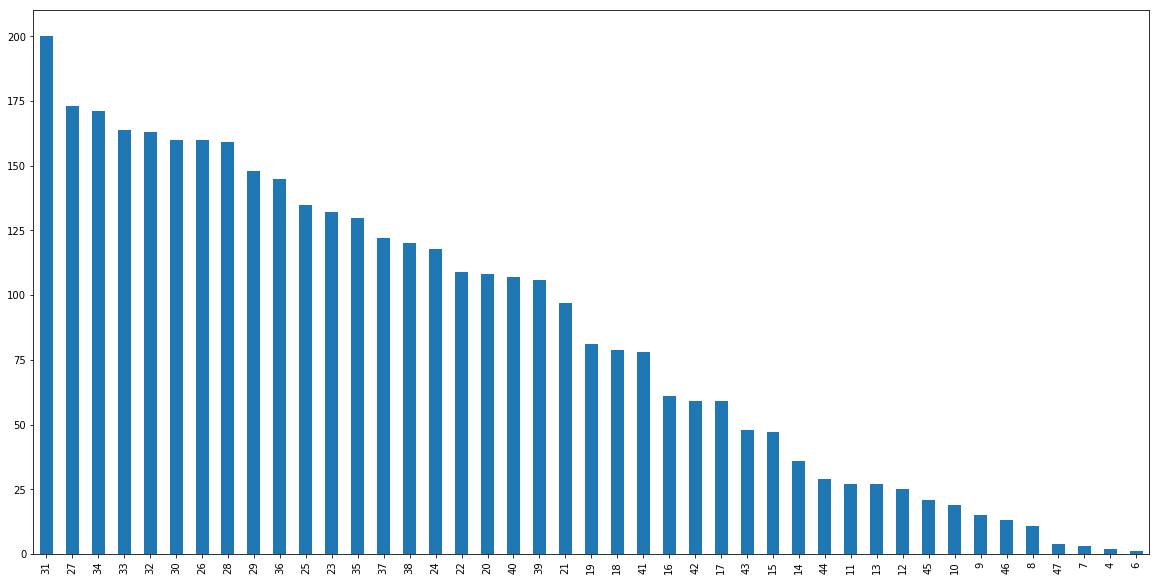

In [16]:
b4vc.plot(kind='bar')

In [60]:
b4vc_vals = b4vc.index
b4vc_vals

Int64Index([31, 27, 34, 33, 32, 30, 26, 28, 29, 36, 25, 23, 35, 37, 38, 24, 22,
            20, 40, 39, 21, 19, 18, 41, 16, 42, 17, 43, 15, 14, 44, 11, 13, 12,
            45, 10,  9, 46,  8, 47,  7,  4,  6],
           dtype='int64')

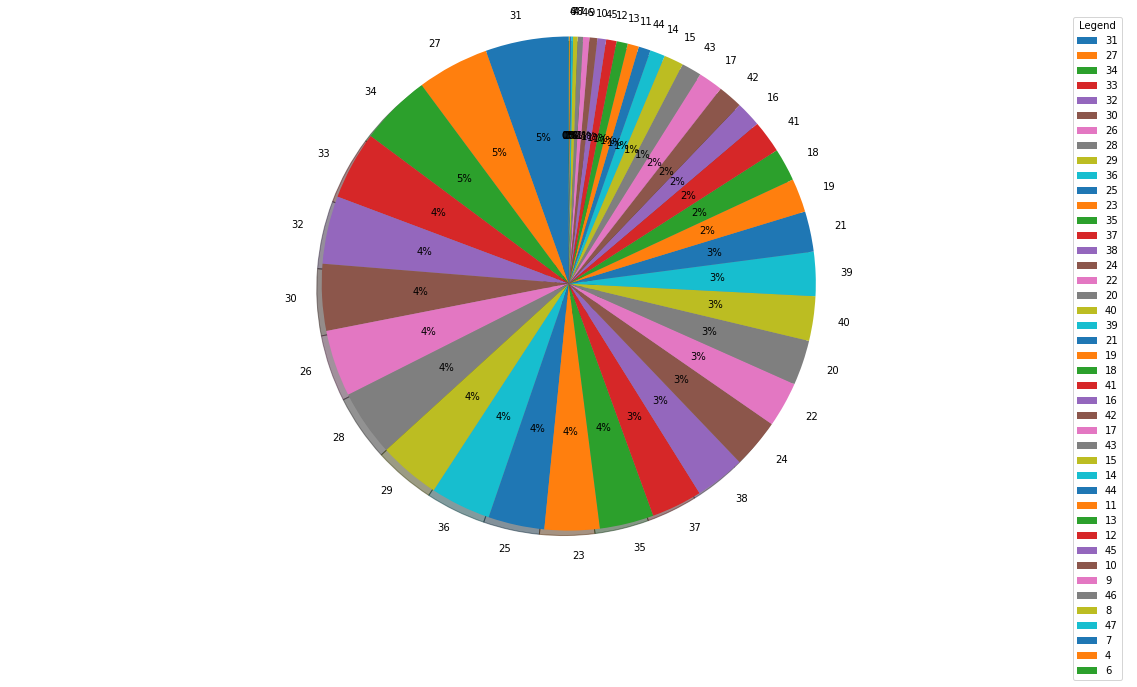

In [61]:
fig1, ax1 = plt.subplots()

explode = (0.05, 0)

ax1.pie(b4vc, autopct='%1.0f%%', labels=b4vc_vals, shadow=True, startangle=90)
ax1.axis('equal')
plt.legend(title="Legend")
plt.show()

### Ball #5

In [17]:
# set
b5 = draws["NUMBER DRAWN 5"]

# describe
b5.describe()

count    3672.000000
mean       36.156046
std         7.210188
min        11.000000
25%        31.000000
50%        37.000000
75%        42.000000
max        48.000000
Name: NUMBER DRAWN 5, dtype: float64

In [18]:
# unique
b5vc = b5.value_counts()
b5vc.columns = ["value"]
b5vc

38    211
41    207
40    203
43    192
37    190
34    186
39    185
42    184
36    166
44    165
35    164
45    161
33    143
31    140
46    138
32    128
30    115
27     94
29     88
28     86
47     83
24     63
26     62
25     55
48     46
23     40
22     37
21     35
20     28
19     23
17     15
18     11
14      9
13      6
16      6
12      3
11      2
15      2
Name: NUMBER DRAWN 5, dtype: int64

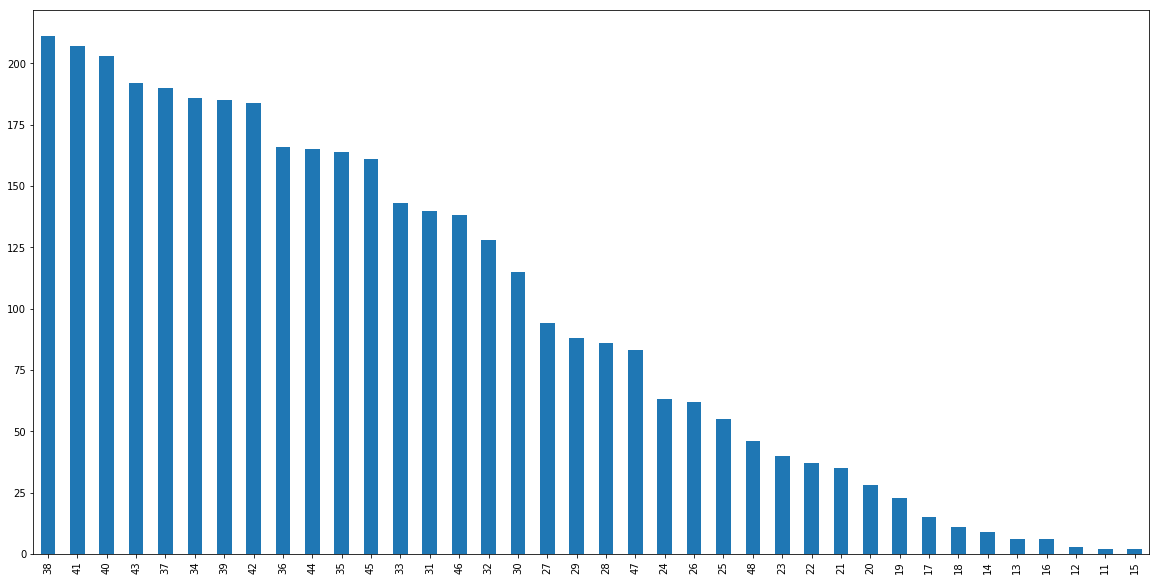

In [19]:
b5vc.plot(kind='bar')

In [62]:
b5vc_vals = b5vc.index
b5vc_vals

Int64Index([38, 41, 40, 43, 37, 34, 39, 42, 36, 44, 35, 45, 33, 31, 46, 32, 30,
            27, 29, 28, 47, 24, 26, 25, 48, 23, 22, 21, 20, 19, 17, 18, 14, 13,
            16, 12, 11, 15],
           dtype='int64')

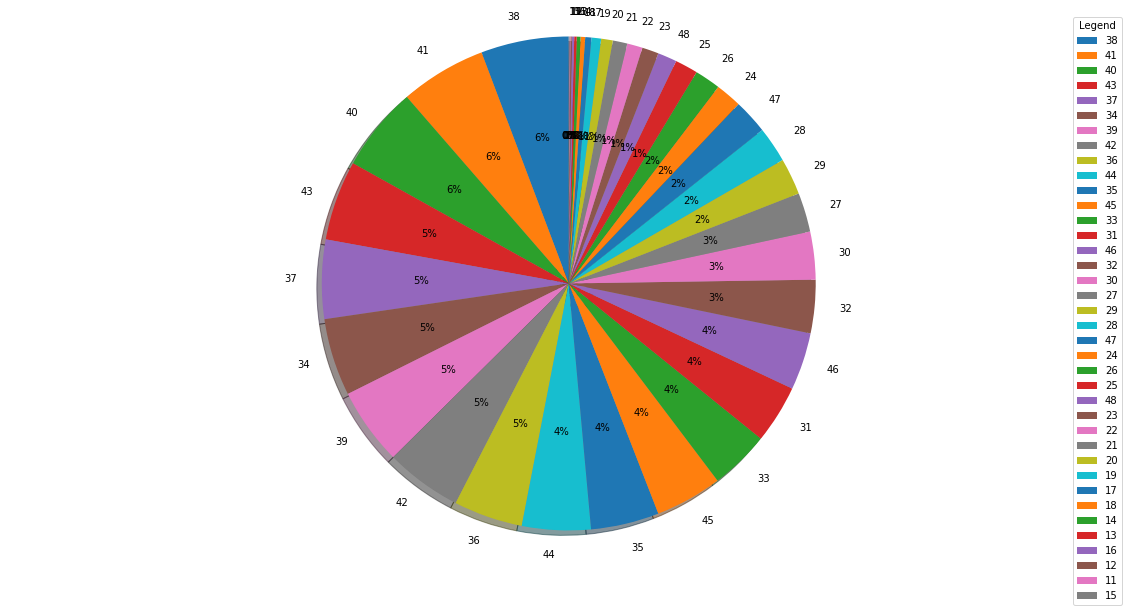

In [63]:
fig1, ax1 = plt.subplots()

explode = (0.05, 0)

ax1.pie(b5vc, autopct='%1.0f%%', labels=b5vc_vals, shadow=True, startangle=90)
ax1.axis('equal')
plt.legend(title="Legend")
plt.show()


### Ball #6


In [20]:
# set
b6 = draws["NUMBER DRAWN 6"]

# describe
b6.describe()

count    3672.000000
mean       43.091503
std         5.522822
min        13.000000
25%        40.000000
50%        45.000000
75%        47.000000
max        49.000000
Name: NUMBER DRAWN 6, dtype: float64

In [21]:
# unique
b6vc = b6.value_counts()
b6vc.columns = ["value"]
b6vc

49    449
48    396
47    392
46    324
45    308
44    267
43    233
42    199
41    157
40    156
39    125
38    106
37     88
36     85
35     76
33     54
34     46
32     39
31     37
29     28
30     23
28     21
27     18
26     12
23      7
25      6
24      5
20      5
21      4
19      3
13      1
22      1
18      1
Name: NUMBER DRAWN 6, dtype: int64

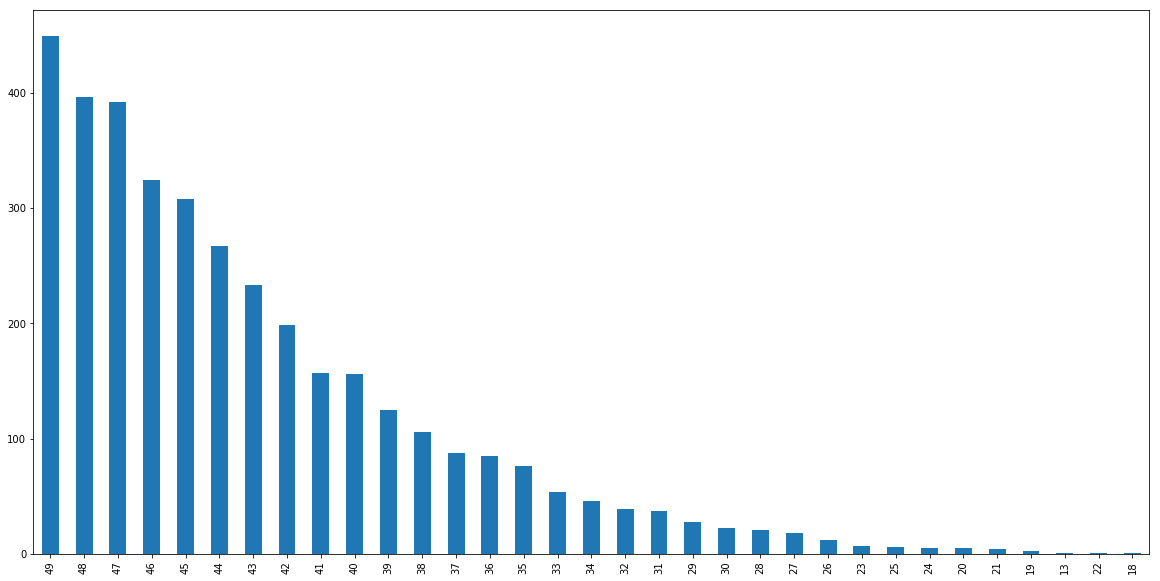

In [22]:
b6vc.plot(kind='bar')

In [64]:
b6vc_vals = b6vc.index
b6vc_vals

Int64Index([49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 33, 34,
            32, 31, 29, 30, 28, 27, 26, 23, 25, 24, 20, 21, 19, 13, 22, 18],
           dtype='int64')

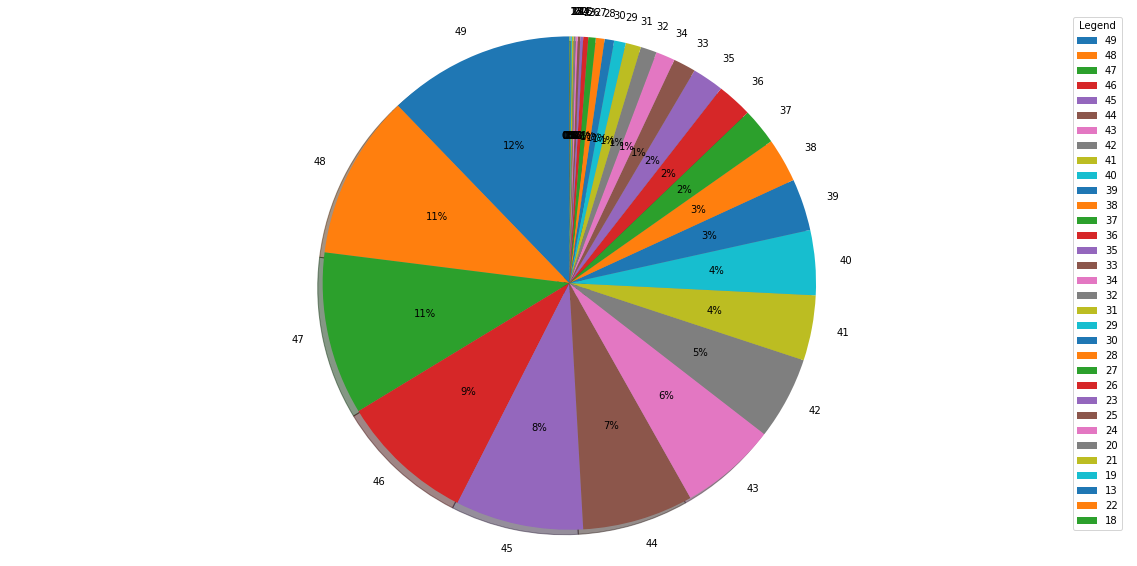

In [65]:
fig1, ax1 = plt.subplots()

explode = (0.05, 0)

ax1.pie(b6vc, autopct='%1.0f%%', labels=b6vc_vals, shadow=True, startangle=90)
ax1.axis('equal')
plt.legend(title="Legend")
plt.show()

## Max Numbers

In [66]:
total_counts = []
total_values = []
for index, column in enumerate(draws.columns):
    df = draws[column].value_counts().to_frame()
    df.columns = ["value"]
    val = df.iloc[0]
    total_counts.append(val.name)
    total_values.append(val.value)
    print("Most drawn number for %s is the number %s at %s times" % (draws.columns[index], str(val.name), str(val.item())) )

Most drawn number for NUMBER DRAWN 1 is the number 1 at 425 times
Most drawn number for NUMBER DRAWN 2 is the number 12 at 194 times
Most drawn number for NUMBER DRAWN 3 is the number 22 at 177 times
Most drawn number for NUMBER DRAWN 4 is the number 31 at 200 times
Most drawn number for NUMBER DRAWN 5 is the number 38 at 211 times
Most drawn number for NUMBER DRAWN 6 is the number 49 at 449 times


In [24]:
total_counts

[1, 12, 22, 31, 38, 49]

In [25]:
total_values

[425, 194, 177, 200, 211, 449]

In [26]:
index = ['Ball 1','Ball 2','Ball 3','Ball 4','Ball 5','Ball 6']
count = 'number chosen'
value = 'times chosen'
columns = [count,value]
df = pd.DataFrame(index=index, columns=columns)
df[count] = total_counts
df[value] = total_values


In [27]:
df

,number chosen,times chosen
Ball 1,1,425
Ball 2,12,194
Ball 3,22,177
Ball 4,31,200
Ball 5,38,211
Ball 6,49,449
